# Возможности работы в экосистеме `Hugging Face`

## Введение


### Методология __OSEMN__

OSEMN — это общая методология решения задачи в Data Science.

Методология по существу состоит из 5 шагов.
5 шагов могут быть представлены 3 ролями:
* Data Engineer — работа с большими данными, получение, очистка, хранение данных и формирование датасета под требования задачи.
* Data Analyst — анализ задачи от ее технической (бизнес) постановки до ее решения в области data science, а также интерпретация результатов.
* Data Scientist — решение задач на основе данных, в т. ч. обучение моделей ИИ.

К 5 шагам могут быть добавлены еще два, относящиеся к области внедрения результатов. За реализацию этих шагов отвечают т. н. ML Engineers.

<img src="https://github.com/MVRonkin/Deep-Learning-Foundation-Course/raw/main/2024_Demo/OSEMN.png" width="700px">

## Виды переноса обучения

В стандартной практике работы в data science собственноручно написанные модели используются редко. Как правило, пользуются уже предобученными моделями. Это связано с несколькими факторами, среди них перечислим следующие:
* Отсутствие достаточно большого набора данных для качественного обучения моделей «с нуля».
* Отсутствие достаточных вычислительных ресурсов для качественного обучения больших моделей «с нуля».
* Классы данных предварительно обученной модели во многом совпадают с целевыми данными или включают их как подмножество (схожесть домена).
> Отметим, что даже в отсутствии схожести домена предобученные нейронные сети являются хорошей инициализацией для работы с моделью. Поэтому готовые, хорошо зарекомендовавшие себя модели лучше использовать «подготовленными» для набора данных. Более того, известно, что в сверточных моделях нижние слои больше выделяют классонезависимые признаки, а с формированием признаков классов работают верхние слои кодировщика.

В зависимости от выбора перечисленных причин использования готовых архитектур могут быть различные стратегии их обучения. Иллюстрация некоторых стратегий приведена ниже:  

<img src="https://github.com/MVRonkin/Deep-Learning-Foundation-Course/raw/main/2024_Demo/PreTrained.png" width="700px">

Общая идея [заключается в том](https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras), что чем больше разница в доменах, тем больше должно быть данных и тем больше слоев сети (от окончания к началу), которые должны быть обучены. Однако нужно отметить, что слишком большое число удаленных слоев может привести к эффекту появления «переобучения» в предобученной архитектуре. Поэтому нужное число слоев должно быть определено эмпирически.

Среди стратегий использования готовых моделей можно выделить следующие:
* __Использование полностью готовой модели__, если известно, что целевой класс попадает в набор данных предобучения (__`Pretrained network`__).
* __Использование готового кодировщика признаков__, переобучение только головной части (__`Transfer learning`__). Эта наиболее частая стратегия, предполагающая, что задача попадает в домен предобучения, поэтому признаки будут релевантны. Но для конкретного набора данных необходимо обучить слои принятия решений (головную часть). При таком дообучении значения параметров кодировщика признаков фиксируются (т.н. `freeze`).
* __Использование предобученной архитектуры как инициализации параметров__ для целевого обучения (__`fine tuning`__). При этом часть параметров кодировщика может быть фиксирована. Например, могут быть фиксированы нижние слои или все, кроме параметров нормализации.зации.

## Где брать готовые модели


| **Расположение** | **Что здесь?** | **Ссылка(и)** |
| ----- | ----- | ----- |
| **Библиотеки домена PyTorch** | Каждая из библиотек домена PyTorch (напр.,`torchvision`) поставляется с предварительно обученными моделями в той или иной форме. Модели в них работают прямо в PyTorch. | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [`torchhub`](https://pytorch.org/hub/), |
| **HuggingFace Hub** | Большой набор предварительно обученных моделей для различных доменов, в том числе компьютерное зрение и мультимодальных архитектур от организаций по всему миру. Также есть множество различных наборов данных. | https://huggingface.co/models, https://huggingface.co/datasets |
| **`timm` (PyTorch Image Models) библиотека** | Почти все самые последние и лучшие модели компьютерного зрения в коде PyTorch, а также множество других полезных функций компьютерного зрения. | https://github.com/rwightman/pytorch-image-models|
| **Paperswithcode** | Коллекция последних статей по машинному обучению с приложенным кодом. Здесь также можно найти эталоны производительности моделей в различных задачах. | https://paperswithcode.com/ |
| **ultralytics** | индустриальные модели машинного обучения, в основом YOLO. |https://docs.ultralytics.com/ |

## Где брать датасеты


Затрагивая тему данных, важно отметить __о возможных источниках поиска открытых данных__. Среди таких источников укажем следующие.
* [__`torchvision.datasets`__](https://pytorch.org/vision/main/datasets.html) — коллекция наборов данных по компьютерному зрению от `PyTorch`. Сегодня `PyTorch` предоставляет аналогичный функционал для [текстов](https://pytorch.org/text/stable/datasets.html) и [аудиофайлов](https://pytorch.org/audio/stable/datasets.html).
* __Библиотека [`Datasets`](https://huggingface.co/docs/datasets/en/index)__ от Hugging Face и [datasets hub](https://huggingface.co/datasets) — один из наиболее популярных и быстрорастущих источников данных.
* Коллекция наборов данных — бенчмарков от [__paperswithcode__](https://paperswithcode.com/datasets).
* Коллекция наборов данных к соревнованиям от [__Kaggle__](https://www.kaggle.com/datasets).
* __Поисковик наборов данных от [Google](https://datasetsearch.research.google.com/)__, также иногда наборы данных публикуют на [__GitHub__](https://github.com/).
* Коллекции специализированных данных, например [__physionet__](https://physionet.org/).
* Наборы данных к научным исследованиям от [__Mendeley Data__](https://data.mendeley.com/), [__Zenodo__](https://zenodo.org/), [Roboflow](https://public.roboflow.com/) и [__IEEE DataPort__](https://ieee-dataport.org/), а также наборы данных, публикуемые в научных изданиях (так как имеют научную значимость сами по себе), например издание [__Scientific Data__](https://www.nature.com/sdata/), [__MDPI Data__](https://www.mdpi.com/journal/data) и другие.

Также важно отметить, что в данном уроке __не рассматриваются вопросы разметки данных__. Разметка данных, как правило, проводится или в полуручном режиме (если это проще), или на сторонних сервисах, например:
* [`LabelMe`](https://github.com/labelmeai/labelme),
* [`CVAT`](https://www.cvat.ai/),
* [`Roboflow`](https://docs.roboflow.com/annotate/annotation-tools),
* или [других](https://www.basic.ai/blog-post/top-10-best-data-annotation-data-labeling-tools-2024).

> Также отметим, что помимо аннотирования важно понимать необходимость управления данными при их пополнении. Эта процедура может быть названа [data management](https://fullstackdeeplearning.com/course/2022/lecture-4-data-management/).

## Фреймворки для обучения нейронных сетей

[[Необходимость фреймворков связана с](https://softwaremill.com/ml-engineer-comparison-of-pytorch-tensorflow-jax-and-flax/#analysis):
1. __набором стандартных блоков__ для прототипирования нейронных сетей: (слои, модели, обучение НС, работа НС, работа с данными);
2. __автоматизированной high api процедурой обучения__ — процедура обратного распространения ошибки. В фреймворках обучения НС эта процедура автоматическая и не требует лишнего кодинга;
3. __оптимальной работой с вычислителями__ — работа с CPU/GPU/MPS/TPU и т. д. в единых high api процедурах, параллелизм вычислителей.

Рассмотрим некоторые [из популярных фреймворков](https://developer.nvidia.com/deep-learning-frameworks).
| **Фреймворк** | **Что здесь?** | **Ссылка(и)** |
| ----- | ----- | ----- |
| **PyTorch + Lightning** | Наиболее популярный фреймворк, широкое сообщество, экосистема | [https://pytorch.org/](https://pytorch.org/), [pytorch-lightning](https://github.com/Lightning-AI/pytorch-lightning) |
| **Tensorflow + Keras** | Когда-то популярный фреймворк, есть удобные high api [__keras__](https://keras.io/), есть удобная система реализации на конечных устройствах | [www.tensorflow.org/](https://www.tensorflow.org/), [keras](https://keras.io/) |
| **JAX + Flax** | Один из наиболее современных фреймворков, сообщество собирается | [jax](https://jax.readthedocs.io/en/latest/quickstart.html) |
| **MXNet + Gluon** | Инструменты Apache, ограниченное сообщество | [mxnet.apache.org](https://mxnet.apache.org/versions/1.9.1/) |
| **HuggingFace** | Коллекция инструментов для современного ИИ, в основном всё на PyTorch | https://huggingface.co/ |
| **ultralytics** | Индустриальные модели машинного обучения, в основном YOLO, в основном всё на PyTorch. |https://docs.ultralytics.com/ |

[На самом деле стек технологий для ИИ проектов куда шире](https://fullstackdeeplearning.com/course/2022/lecture-2-development-infrastructure-and-tooling/)

<img src="https://fullstackdeeplearning.com/course/2022/lecture-2-development-infrastructure-and-tooling/media/image15.png" width="900px">

* Из всего указанного мы выберем проект на экосистеме [<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/2560px-PyTorch_logo_black.svg.png" width="200px">](https://pytorch.org/).
* Для упрощения работы с моделями выберем high-api [`Lightning` <img src="https://avatars.githubusercontent.com/u/98025367?s=200&v=4" width="100px">](https://github.com/Lightning-AI/pytorch-lightning).
* Также воспользуемся библиотекой [`TorchMetrics`](https://github.com/Lightning-AI/torchmetrics) для оценки метрик.
* Попробуем вызвать готовые модели из разных фреймворков для обучения.  


## Импорт

Базовые шаги для настройки `jupyter`

In [ ]:
%load_ext autoreload
%autoreload 2

import ssl
ssl._create_default_https_context = ssl._create_stdlib_context

Базовые библиотеки

In [ ]:
import os
import time
import random
import platform
import requests
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

`Torch` и его компоненты

In [ ]:
import torch
from torch import nn
import torch.utils.data
import torch.nn.functional as F

`Torchvision` - Специальные компоненты `Torch` для компьютерного зрения.

In [ ]:
import torchvision
from torchvision import transforms, datasets
from torchvision.datasets.utils import download_and_extract_archive

вспомогательные утилиты

In [ ]:
!pip install torchinfo

In [ ]:
import urllib.request
from pprint import pprint
from torchinfo import summary
from tqdm.notebook import tqdm, trange
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Коллекция моделей `timm`

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.1 MB/s eta 0:00:00


In [ ]:
import timm

Особенность `Hugging Face` - отдельные классы под отдельные семейства моделей

In [ ]:
from transformers import MobileViTForImageClassification

[`Pytorch-Lightning`](https://pytorch-lightning.readthedocs.io/en/1.7.7/starter/installation.html) - Библиотеки над Pytorch для упрощения работы.

In [ ]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 50.6 MB/s eta 0:00:00


In [ ]:
import lightning as pl
from lightning.pytorch.loggers import CSVLogger
from torchmetrics.classification import  Accuracy

Вспомогательные утилиты скачаем в виде внешней коллекции [`utilitsFDLC.py`](https://github.com/MVRonkin/Deep-Learning-Foundation-Course/blob/main/2024_Demo/utilitsFDLC.py)

In [ ]:
if not os.path.exists('utilitsFDLC.py' ):
    url = "https://github.com/MVRonkin/Deep-Learning-Foundation-Course/raw/refs/heads/main/2024_Demo/utilitsFDLC.py"
    filename, headers = urllib.request.urlretrieve(url,filename='utilitsFDLC.py' )

In [ ]:
from utilitsFDLC import *

Платформа и директория для набора данных и логов.

In [ ]:
root_directory = set_root()
root_directory

PosixPath('/root/data')

Выбираем устройства для работы, а также оценим некоторые особенности производительности нашего вычислителя.


In [ ]:
logger=CSVLogger(save_dir=root_directory/'Log')

In [ ]:
device, num_workers = torch_set_device()
torch.set_default_device(device)
g = torch.Generator(device = device)

torch version: 2.4
Using device: cuda
cuda:  cu121
number of devices: 1
available number of workers: 2


Для большей воспроизводимости экспериментов.

In [ ]:
pl.seed_everything(42, workers=True)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


42

# Перенос обучения для задачи классификации в `HF`

## Загрузка данных при помощи бибилотеки `datasets`

В данном примере воспользуемся изученным ранее набором данных «деревья с улиц» ([The Tree Dataset of Urban Street](https://ytt917251944.github.io/dataset_jekyll/)  [Urban street tree dataset for image classification and instance segmentation](https://www.sciencedirect.com/science/article/pii/S0168169923002405?via%3Dihub)).

Загрузку данных произведем при помощи функции `download_and_extract_archive` из библиотеки `torchvision`.

<img src="https://ytt917251944.github.io/dataset_jekyll/assets/img/class/classification-tree.png" width="400px">

Скачаем набор данных, если этого еще не произошло.

In [ ]:
url = 'https://github.com/MVRonkin/Deep-Learning-Foundation-Course/raw/refs/heads/main/2024_Demo/tree.zip'

archive_name = url.split('/')[-1]
dataset_directory =root_directory / archive_name
dataset_directory = Path(os.path.splitext(dataset_directory)[0])

if not os.path.exists(dataset_directory):
    download_and_extract_archive(url, root_directory)

list(dataset_directory.iterdir())

100%|██████████| 71421048/71421048 [00:00<00:00, 343778359.97it/s]


Extracting /root/data/tree.zip to /root/data


[PosixPath('/root/data/tree/train'),
 PosixPath('/root/data/tree/test'),
 PosixPath('/root/data/tree/val')]

Зададим директорию с набором данных.

Структура набора данных.

In [ ]:
pprint(os.listdir(dataset_directory))
pprint(os.listdir(dataset_directory /'train'))

['train', 'test', 'val']
['Ginkgo',
 'Koelreuteria',
 'Lagerstroemia',
 'Elaeocarpus',
 'Acer',
 'Cherry',
 'Cinnamomum',
 'Celtis',
 'Cedrus']


Зададим преобразования данных.

`PyTorch` позволяет производить преобразования входных данных при помощи класса `transforms.Compose`. Объект этого класса позволяет описывать последовательность преобразований над входными данными, указывая их в виде списка.

Объект класса `transforms.Compose` будет передан в соответствующем аргументе в загрузчик данных нашего датасета.

In [ ]:
MEAN = [0.485, 0.456, 0.406]
STD  = [0.229, 0.224, 0.225]

train_transform =  transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD)
    ])

test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD)
    ])

Загрузка данных в формате `ImageFolder`

In [ ]:
dm = ImageFolderDataset(dataset_dir= dataset_directory,  device = device)
dm.set_transforms(train_transform,test_transform )

train_loader = dm.train_dataloader()
val_loader   = dm.val_dataloader()
test_loader  = dm.test_dataloader()
x,y = next(iter(test_loader))


Проверка

In [ ]:
names_classes = dm.names_classes
print(names_classes)

['Acer', 'Cedrus', 'Celtis', 'Cherry', 'Cinnamomum', 'Elaeocarpus', 'Ginkgo', 'Koelreuteria', 'Lagerstroemia']


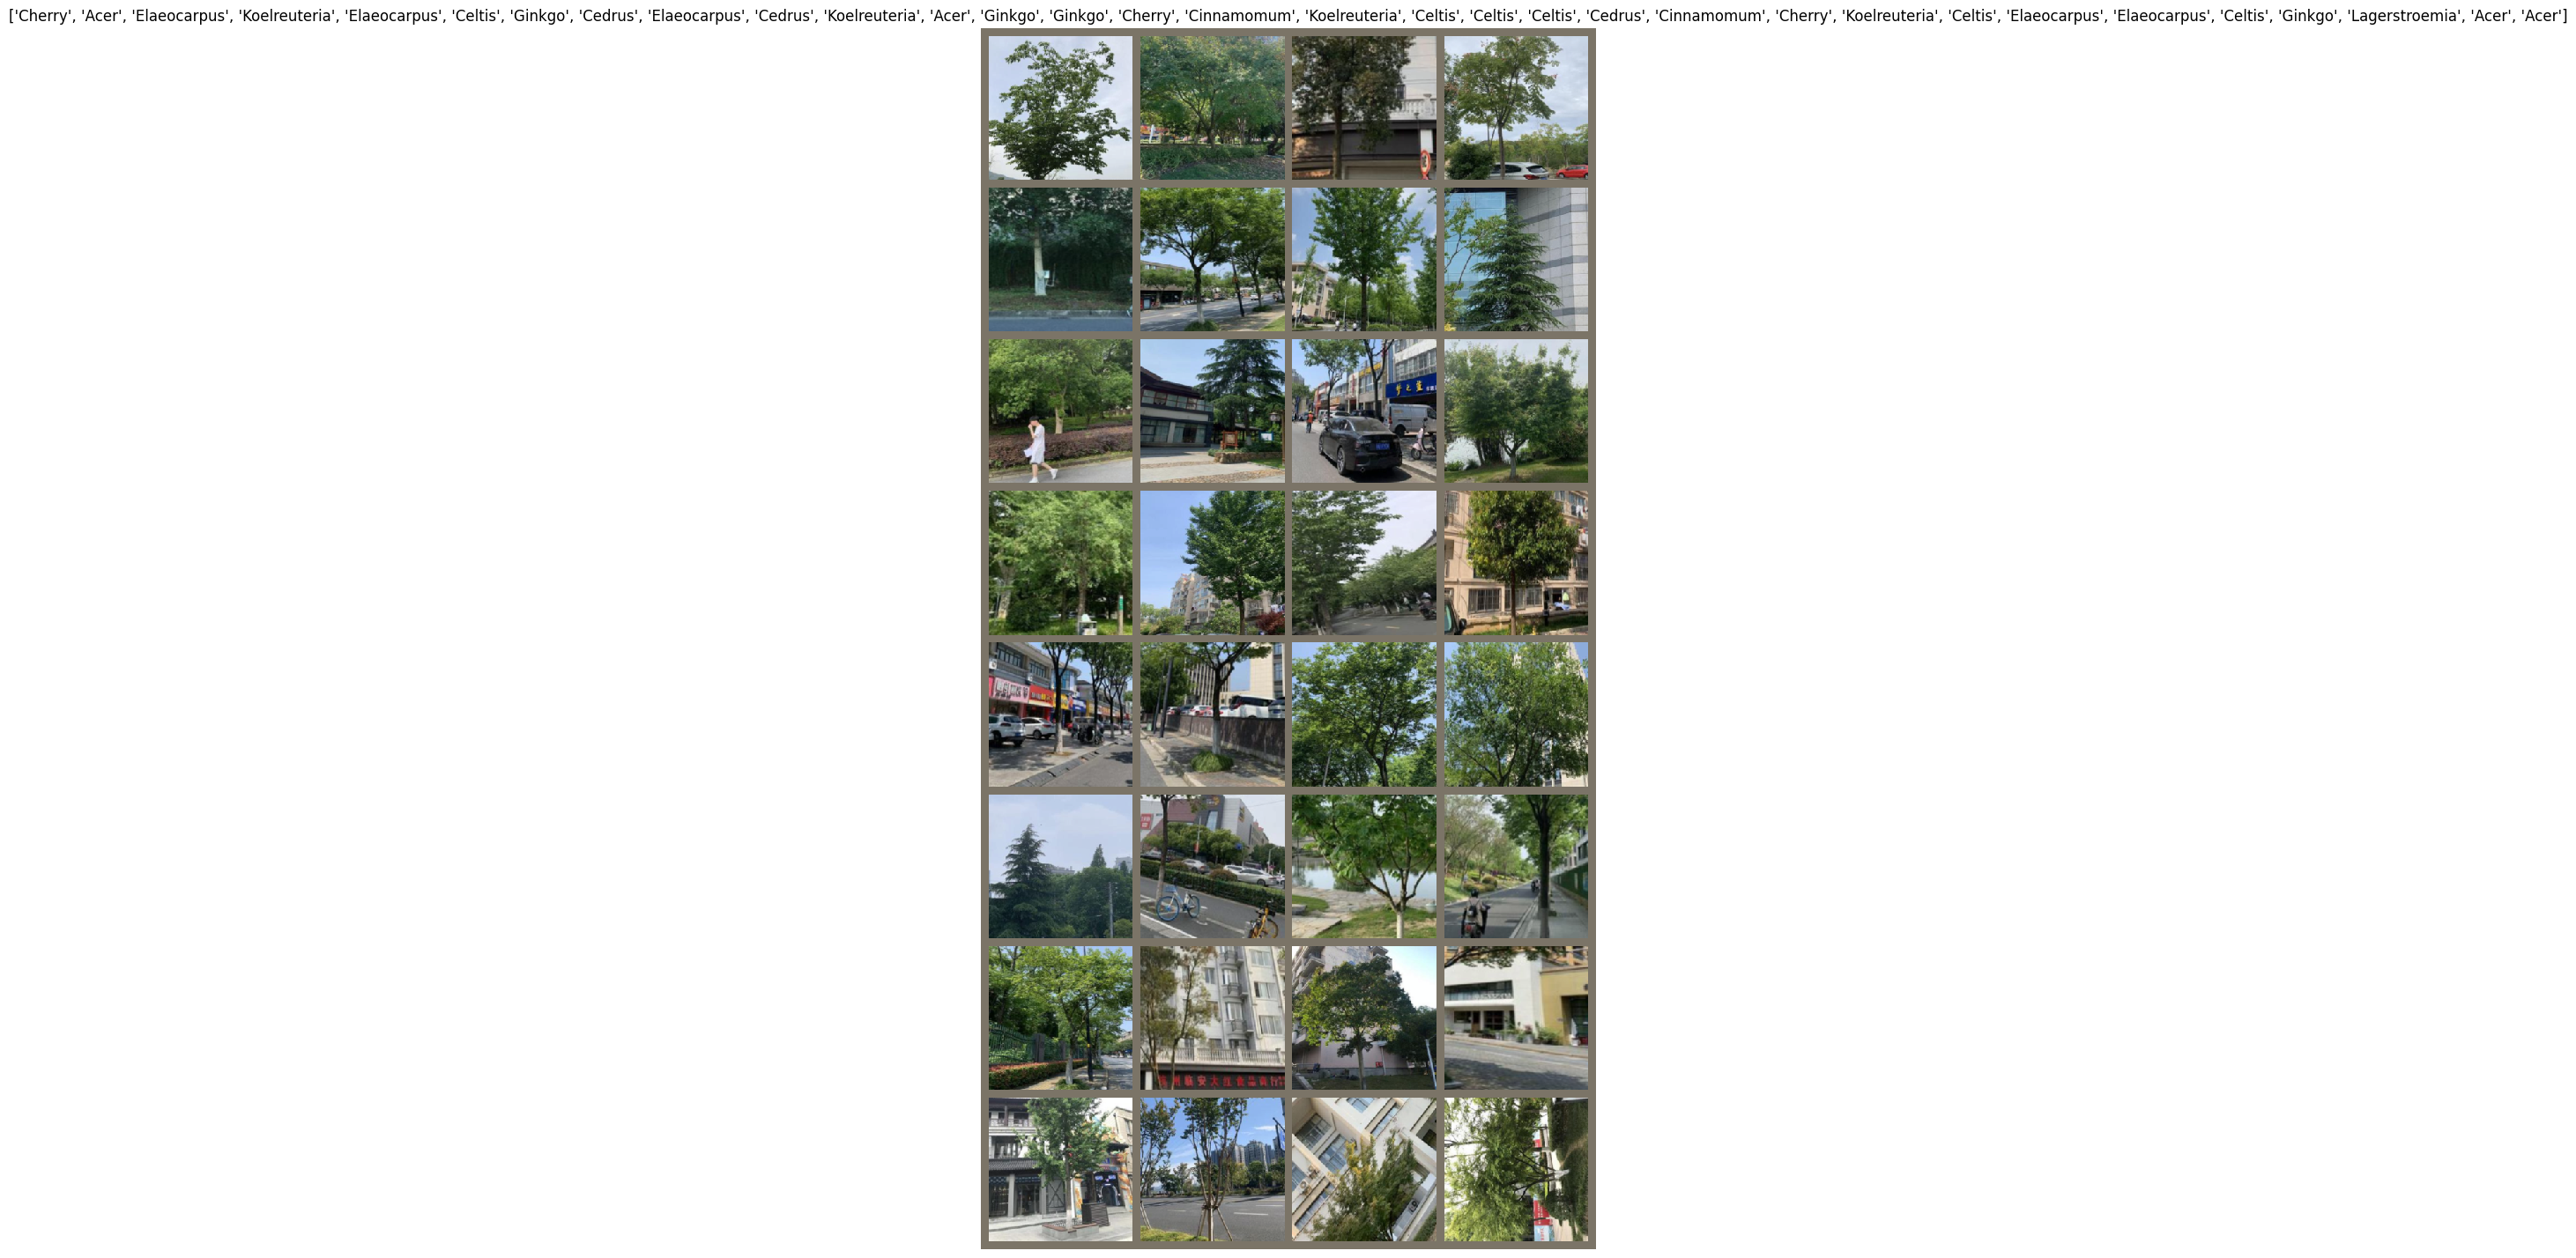

In [ ]:
# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, nrow = 4, padding = 12 )

torch_imshow(out, title=[names_classes[x] for x in classes])

## Загрузка модели

### Загрузка из PyTorch

 Проверим ряд моделей из `torchvision.models`, список всех моделей можно найти, например, [тут](https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights).

Примеры вызова моделей.
```python
model = torchvision.models.resnet18(weights=         'ResNet18_Weights.IMAGENET1K_V1')
model = torchvision.models.efficientnet_b0(weights = 'EfficientNet_B0_Weights.IMAGENET1K_V1')
model = torchvision.models.densenet121(weights =     'DenseNet121_Weights.IMAGENET1K_V1')
model = torchvision.models.convnext_tiny(weights =   'ConvNeXt_Tiny_Weights.IMAGENET1K_V1')
model = torchvision.models.swin_v2_s(weights =       'Swin_V2_S_Weights.IMAGENET1K_V1')
model = torchvision.models.mobilenet_v2(weights =    'MobileNet_V2_Weights.IMAGENET1K_V1')
```

In [ ]:
model = torchvision.models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


* После загрузки модели нужно заморозить все параметры для экстрактора признаков. Для этого нам нужно установить `requires_grad = False`, чтобы заморозить параметры, чтобы градиенты не вычислялись в `backward()`. То есть такой мерой мы предотвращаем возможное переобучении модели. Для заморозки модели воспользуемся утилитой `freeze_model`.
* После того как сформирована фиксированная модель, можно приступить к разморозке и/или замене части слоев.
Как правило, оперируют только с головными слоями. Заменим последний головной полносвязный слой (`fc`) на свой, представляющий линейный слой с выходом, равным числу классов. Для этого используем утилиту `replace_last_linear_layer`.
* Проверим, сколько параметров будут учиться.


In [ ]:
model = freeze_model(model)
model = replace_last_linear_layer(model, len(names_classes))
print_trainable_parameters(model)

trainable params: 513000 || all params: 11689512 || trainable%: 4.39


Обратите внимание, что в некоторых случаях головная часть может и не содержать линейного слоя.

In [ ]:
model = torchvision.models.squeezenet1_0(weights=torchvision.models.squeezenet.SqueezeNet1_0_Weights.IMAGENET1K_V1)
*_, last = model.named_children()
print(last)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 25.5MB/s]


('classifier', Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))
  (2): ReLU(inplace=True)
  (3): AdaptiveAvgPool2d(output_size=(1, 1))
))


### Загрузка из TIMM

Часто моделей из `torchvision` не достаточно для полноценного исследования. Одним из наиболее популярных сегодня решений для задач классификации (и получения готовых [`feature extractor`](https://huggingface.co/docs/timm/feature_extraction)) является библиотека [`timm`](https://huggingface.co/timm). Предобученные [модели библиотеки timm](https://huggingface.co/models?pipeline_tag=image-classification&library=timm,pytorch&sort=trending) [обладают широким функционалом](https://huggingface.co/docs/timm/quickstart), в том числе для задач `transfer learning`. Библиотека содержит более $1000$ моделей и набор стандартных датасетов для их предобучения.

Модели в `Timm` можно найти при помощи [поисковика hugging face](https://huggingface.co/models?pipeline_tag=image-classification&library=timm,pytorch&sort=trending) или функции  `list_models` как это показано ниже.

In [ ]:
model_names = timm.list_models('*mobile*')
print(model_names[:15])#pprint(model_names[:15])

['mobilenet_edgetpu_100', 'mobilenet_edgetpu_v2_l', 'mobilenet_edgetpu_v2_m', 'mobilenet_edgetpu_v2_s', 'mobilenet_edgetpu_v2_xs', 'mobilenetv1_100', 'mobilenetv1_100h', 'mobilenetv1_125', 'mobilenetv2_035', 'mobilenetv2_050', 'mobilenetv2_075', 'mobilenetv2_100', 'mobilenetv2_110d', 'mobilenetv2_120d', 'mobilenetv2_140']


Проверим одну из моделей `TIMM`

In [ ]:
model = timm.create_model('mobilenetv3_large_100', pretrained=True, in_chans=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.1M [00:00<?, ?B/s]

In [ ]:
model = freeze_model(model)
model = replace_last_linear_layer(model, len(names_classes))
print_trainable_parameters(model)

trainable params: 1281000 || all params: 5483032 || trainable%: 23.36


### Загрузка из HF Hub

Экосистема [`Hugging Face`](https://huggingface.co) — это большое сообщество разработчиков инструментов, позволяющих пользователям создавать, обучать и внедрять модели машинного обучения на основе открытого кода и технологий. `Hugging Face` позволяет легко обмениваться инструментами, моделями, весами моделей и наборами данных между другими практикующими специалистами с помощью своего инструментария.

С точки зрения решения задач компьютерного зрения в экосистеме `Hugging Face` можно выделить такие библиотеки, как:
* [`transformers`](https://huggingface.co/docs/transformers/index) — для работы с моделями на основе трансформеров и других современных подходов;
* [`diffusers`](https://huggingface.co/docs/diffusers/index) — для работы с моделями на основе диффузии;
* [`datasets`](https://huggingface.co/docs/datasets/en/index) — для работы с наборами данных;
* [`hub`](https://huggingface.co/docs/huggingface_hub/guides/download) — для работы с пользовательскими проектами;
* [`timm`](https://huggingface.co/docs/timm/feature_extraction) — рассматриваемый ранее проект работы с предобученными свертоными архитектурами и архитектурами-трансформерами для задач компьютерного зрения;
* [`optimum`](https://huggingface.co/docs/optimum/index) — проект по оптимизации моделей для различных типов вычислительных устройств;
* [`peft`](https://huggingface.co/docs/peft/main/en/index) — библиотека для эффективного файнтюнинга моделей при помощи таких алгоритмов, как [`LoRA`](https://huggingface.co/docs/peft/main/en/task_guides/image_classification_lora);
* [`evaluate`](https://huggingface.co/docs/evaluate/index) — библиотека основных метрик оценки результатов работы нейронных сетей.
* и многие другие.


Для каждого типа моделей в `transformers` предусмотрен свой тип загрузки. Так, для моделей `MobileViT` будем использовать `MobileViTForImageClassification`. В данном случае будет загружена предобученная модель `apple/mobilevit-small`, для которой предварительно были загружены преобразования. Оконечный слой модели будет заменен на новый, имеющий число выходов, равное количеству меток в наборе данных (аргумент `num_labels`). Также нужно передать `ignore_mismatched_sizes = True`, чтобы компенсировать изменение количества параметров в слое классификации.

In [ ]:
model = MobileViTForImageClassification.from_pretrained(
    'apple/mobilevit-small',
    ignore_mismatched_sizes = True
)

config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

In [ ]:
model = freeze_model(model)
model = replace_last_linear_layer(model, len(names_classes))
print_trainable_parameters(model)

trainable params: 641000 || all params: 5578632 || trainable%: 11.49


### Перенос обучения

Теперь давайте все-таки перейдем к модели `squeezenet` из `torchvision`.

In [ ]:
model = torchvision.models.squeezenet1_0(weights=torchvision.models.squeezenet.SqueezeNet1_0_Weights.IMAGENET1K_V1)
*_,last = model.named_children()
last

('classifier',
 Sequential(
   (0): Dropout(p=0.5, inplace=False)
   (1): Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))
   (2): ReLU(inplace=True)
   (3): AdaptiveAvgPool2d(output_size=(1, 1))
 ))

In [ ]:
def get_squeezenet_1_0(n_classes ):
    model = torchvision.models.squeezenet1_0(weights=torchvision.models.squeezenet.SqueezeNet1_0_Weights.IMAGENET1K_V1)
    model = freeze_model(model)
    # UNUSUAL LAYER
    model.classifier[1] = nn.Conv2d(512, n_classes, kernel_size=(1, 1), stride=(1, 1))
    # INIT LAYER PARAMETERS
    nn.init.xavier_uniform_(model.classifier[1].weight)
    model.classifier[1].bias.data.fill_(0)
    return model

model = get_squeezenet_1_0(len(names_classes))
print_trainable_parameters(model)

trainable params: 4617 || all params: 740041 || trainable%: 0.62


In [ ]:
summary(model, (1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
SqueezeNet                               [1, 9]                    --
├─Sequential: 1-1                        [1, 512, 13, 13]          --
│    └─Conv2d: 2-1                       [1, 96, 109, 109]         (14,208)
│    └─ReLU: 2-2                         [1, 96, 109, 109]         --
│    └─MaxPool2d: 2-3                    [1, 96, 54, 54]           --
│    └─Fire: 2-4                         [1, 128, 54, 54]          --
│    │    └─Conv2d: 3-1                  [1, 16, 54, 54]           (1,552)
│    │    └─ReLU: 3-2                    [1, 16, 54, 54]           --
│    │    └─Conv2d: 3-3                  [1, 64, 54, 54]           (1,088)
│    │    └─ReLU: 3-4                    [1, 64, 54, 54]           --
│    │    └─Conv2d: 3-5                  [1, 64, 54, 54]           (9,280)
│    │    └─ReLU: 3-6                    [1, 64, 54, 54]           --
│    └─Fire: 2-5                         [1, 128, 54, 54]       

# Подготовка и обучение модели в `Pytorch Lighting`

В этом примере мы создадим модель в фреймворке `PyTorch Lighting` как объект класса `ModelPL`.

In [ ]:
model_ = get_squeezenet_1_0(len(names_classes))
modelpl = ModelPL(lr = 0.001, n_classes = len(names_classes)).set_model(model_)

Мы воспользуемся предобученной моделью.

Модель можно обучить самостоятельно:
```python
trainer = pl.Trainer(max_epochs=30,  logger=logger,)
trainer.fit(model=modelpl, train_dataloaders=train_loader, val_dataloaders = val_loader)
print(trainer.test(modelpl, dataloaders=test_loader, ))
trainer.save_checkpoint("best_model_squeeze.pt", weights_only=False)
```

In [ ]:
trainer = pl.Trainer(max_epochs=30,  logger=logger,  accelerator="gpu",deterministic=True,)
trainer.fit(model=modelpl, train_dataloaders=train_loader, val_dataloaders = val_loader)
print(trainer.test(modelpl, dataloaders=test_loader, ))
trainer.save_checkpoint("best_model_squeeze.pt", weights_only=False)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name          | Type               | Params | Mode 
-------------------------------------------------------------
0 | criterion     | CrossEntropyLoss   | 0      | train
1 | val_accuracy  | MulticlassAccuracy | 0      | train
2 | test_accuracy | MulticlassAccuracy | 0      | train
3 | model         | SqueezeNet         | 740 K  | train
-------------------------------------------------------------
4.6 K     Trainable params
735 K     Non-trainable params
740 K     Total param

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (47) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=30` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7806267738342285     │
│         test_loss         │    0.5914679169654846     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5914679169654846, 'test_acc': 0.7806267738342285}]


In [ ]:
print(trainer.test(modelpl, dataloaders=test_loader, ))
trainer.save_checkpoint("best_model_squeeze.pt", weights_only=False)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7806267738342285     │
│         test_loss         │    0.5914679169654846     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5914679169654846, 'test_acc': 0.7806267738342285}]


In [ ]:
if not os.path.exists('best_model_squeeze.pt' ):
    url = "https://github.com/MVRonkin/Deep-Learning-Foundation-Course/raw/refs/heads/main/2024_Demo/best_model_squeeze.pt"
    filename, headers = urllib.request.urlretrieve(url,filename='best_model_squeeze.pt' )

Для демонстрации дообучим модель на 1 эпохе.

In [ ]:
modelpl.lr = 3e-4
trainer = pl.Trainer(max_epochs=31, logger=logger,)
trainer.fit(model=modelpl, train_dataloaders=train_loader, val_dataloaders = val_loader, ckpt_path = "best_model_squeeze.pt")

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: Restoring states from the checkpoint path at best_model_squeeze.pt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at best_model_squeeze.pt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name          | Type               | Params | Mode 
-------------------------------------------------------------
0 | criterion     | CrossEntropyLoss   | 0      | train
1 | val_accuracy  | MulticlassAccuracy | 0      | train
2 | test_accuracy | MulticlassAccuracy | 0      | train
3 | model     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=31` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=31` reached.


Протестируем модель


In [ ]:
test_acc = trainer.test(modelpl, dataloaders=test_loader, )
print(test_acc)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8005697727203369     │
│         test_loss         │    0.5919538140296936     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5919538140296936, 'test_acc': 0.8005697727203369}]


Модель можно выложить в чистый `Torch` если необходимо.

In [ ]:
model_torch = modelpl.model

Теперь проведем предсказание для одного батча и посмотри на точность результатов

In [ ]:
# PREDICT
x,y = next(iter(test_loader))
with torch.inference_mode():
    y_pred = model_torch(x)

# ACCURACY
y_pred = torch.argmax(y_pred,dim=1)
torch.eq(y.cpu(),y_pred).sum()/y.numel()

tensor(0.8438)

In [ ]:
print(os.listdir(os.path.join(logger.root_dir)))

['version_0']


In [ ]:
os.listdir(os.path.join(logger.root_dir,  'version_0'))

['checkpoints', 'hparams.yaml', 'metrics.csv']

In [ ]:
df = pd.read_csv(os.path.join(logger.root_dir,  'version_0', 'metrics.csv'))
df

epoch  step  test_acc  test_loss  train_loss   val_acc  val_loss
0       0    46       NaN        NaN         NaN  0.263158  1.997473
1       1    49       NaN        NaN    1.886285       NaN       NaN
2       1    93       NaN        NaN         NaN  0.405263  1.635501
3       2    99       NaN        NaN    1.797388       NaN       NaN
4       2   140       NaN        NaN         NaN  0.578947  1.379968
..    ...   ...       ...        ...         ...       ...       ...
60     30  1449       NaN        NaN    0.781292       NaN       NaN
61     30  1456       NaN        NaN         NaN  0.800000  0.558266
62     30  1449       NaN        NaN    0.692062       NaN       NaN
63     30  1456       NaN        NaN         NaN  0.821053  0.571036
64     31  1457   0.80057   0.591954         NaN       NaN       NaN

[65 rows x 7 columns]

In [ ]:
n_classes = len(names_classes)
labels, predicts, probs = eval_macro(model_torch, test_loader, n_classes)
class_correct, class_total = eval_micro(labels, predicts, n_classes)

for i in range(n_classes):
    print(f'Accuracy of {names_classes[i]}\t\t:{100 * class_correct[i] / class_total[i]:.1f}%' )

eval_macro:   0%|          | 0/11 [00:00<?, ?it/s]

Accuracy of Acer		:87.8%
Accuracy of Cedrus		:93.5%
Accuracy of Celtis		:76.3%
Accuracy of Cherry		:69.6%
Accuracy of Cinnamomum		:86.0%
Accuracy of Elaeocarpus		:77.3%
Accuracy of Ginkgo		:91.1%
Accuracy of Koelreuteria		:57.1%
Accuracy of Lagerstroemia		:93.8%


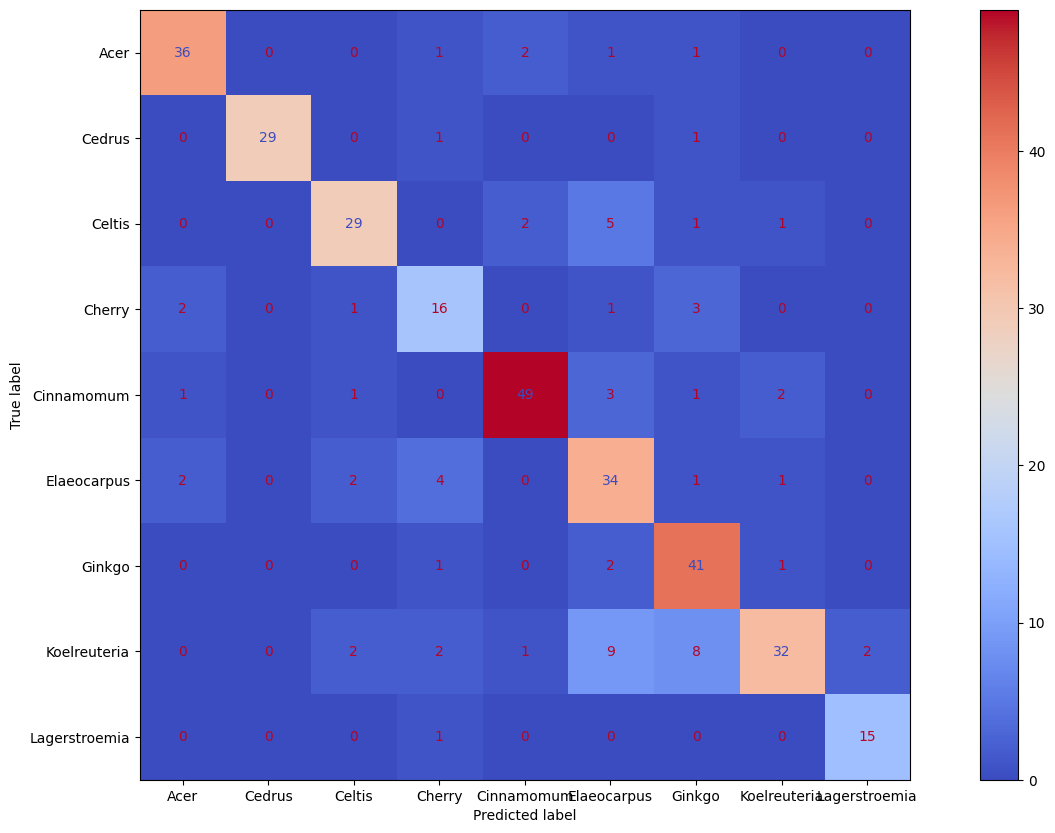

In [ ]:
plot_confusion_matrix(labels, predicts, names_classes,figsize=(18, 10))

In [ ]:
incorrect = eval_incorrect(labels, predicts, probs, test_loader.dataset)

eval_incorrect: 0it [00:00, ?it/s]

In [ ]:
def eval_incorrect(labels, predicts, probs, data):
    incorrect_examples = []
    corrects = torch.eq(labels, predicts)
    for image, label, prob, correct in tqdm(zip(data, labels, probs, corrects), desc="eval_incorrect", leave=False):
        if not correct:
            incorrect_examples.append((image, label, prob))

    incorrect_examples.sort(reverse=True,
                            key=lambda x: torch.max(x[2], dim=0).values)
    return incorrect_examples

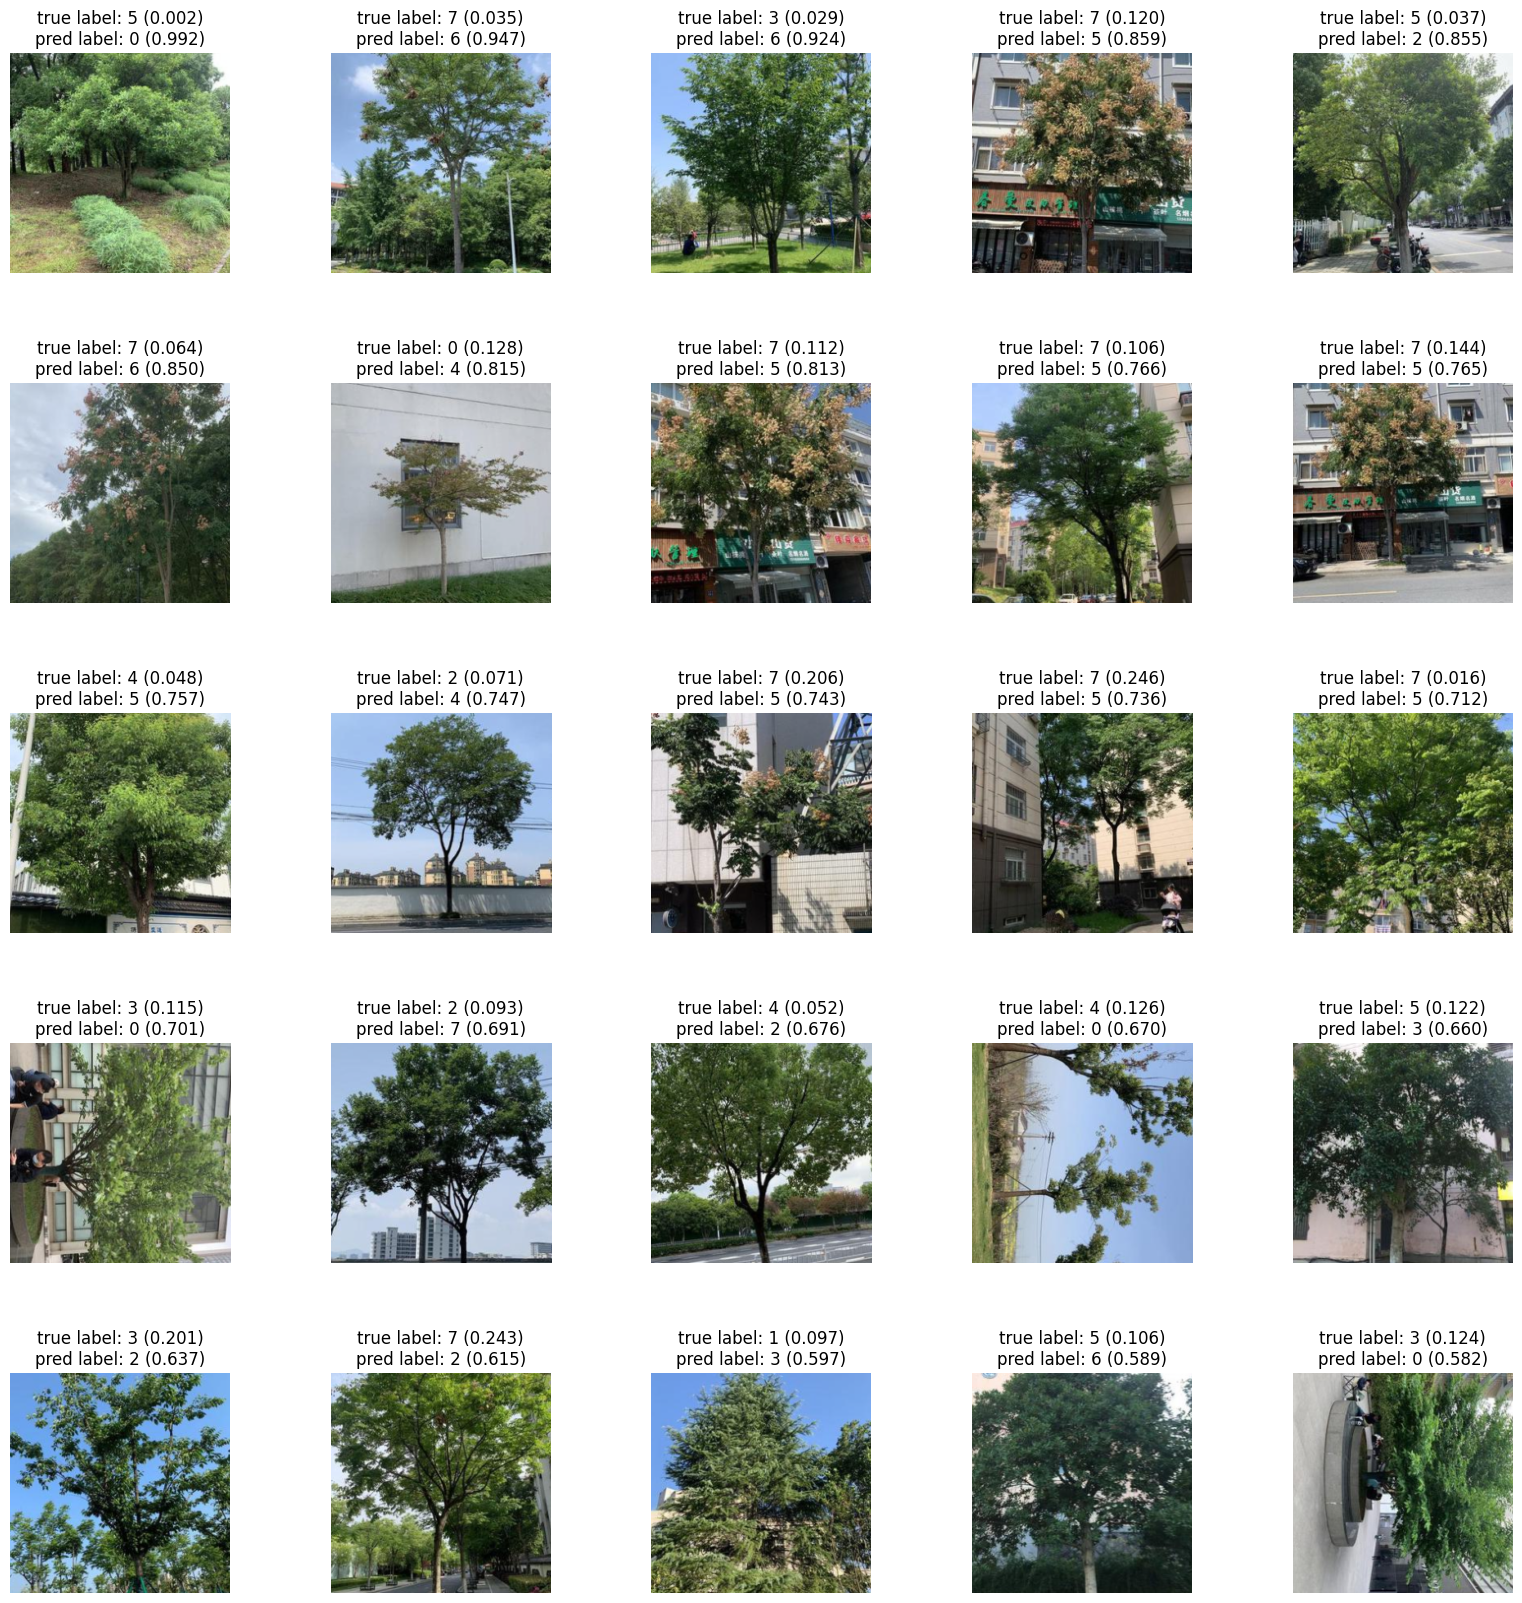

In [ ]:
N_IMAGES = 25
plot_most_incorrect(incorrect, N_IMAGES)